In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Desactivar las advertencias
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv(r'./infomodelo.csv')
data

,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,price,price_category,is_convertible,is_rear,fueltype_gas,aspiration_turbo
0,2548,4,130,3.47,111,21,13495.0,1,True,False,True,False
1,2548,4,130,3.47,111,21,16500.0,1,True,False,True,False
2,2823,6,152,2.68,154,19,16500.0,1,False,False,True,False
3,2337,4,109,3.19,102,24,13950.0,1,False,False,True,False
4,2824,5,136,3.19,115,18,17450.0,1,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
200,2952,4,141,3.78,114,23,16845.0,1,False,False,True,False
201,3049,4,141,3.78,160,19,19045.0,1,False,False,True,True
202,3012,6,173,3.58,134,18,21485.0,1,False,False,True,False
203,3217,6,145,3.01,106,26,22470.0,1,False,False,False,True


In [103]:
# Separamos los df para el modelo
X = data.drop(['price_category','price'],axis=1).values
y = data['price']

In [104]:
from sklearn.model_selection import train_test_split

# Dividimos en sectores de entrenamiento y prueba
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.20, random_state=17)
print(X_Train.shape, Y_Train.shape, X_Test.shape, Y_Test.shape)

(164, 10) (164,) (41, 10) (41,)


In [105]:
linear_model = LinearRegression()
# Entrenamos el modelo
linear_model.fit(X, y)

LinearRegression()

In [106]:
print('La pendiente obtenida con Sklearn es :\n', linear_model.coef_)
print('La ordenada al origen obtenida con Sklearn es:\n', linear_model.intercept_)

La pendiente obtenida con Sklearn es :
 [ 5.64978088e+00  1.66460636e+01  7.21925731e+01 -2.17611634e+03
  4.05296077e+01 -4.32507295e+01  2.51128338e+03  1.09762646e+04
 -1.87562702e+03 -7.57154281e+02]
La ordenada al origen obtenida con Sklearn es:
 -4684.318457506608


In [107]:
# Predecimos las etiquetas de salida Y en el subset de entrenamiento y en el subset de testeo
#para cada una de las instancias
y_train_pred = linear_model.predict(X_Train) # subset de entrenamiento
y_test_pred = linear_model.predict(X_Test) #subset de testeo

In [108]:
from sklearn.metrics import mean_squared_error,r2_score

mse = mean_squared_error(Y_Test, y_test_pred)
r2 = r2_score(Y_Test, y_test_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 12196836.57
R-squared: 0.85


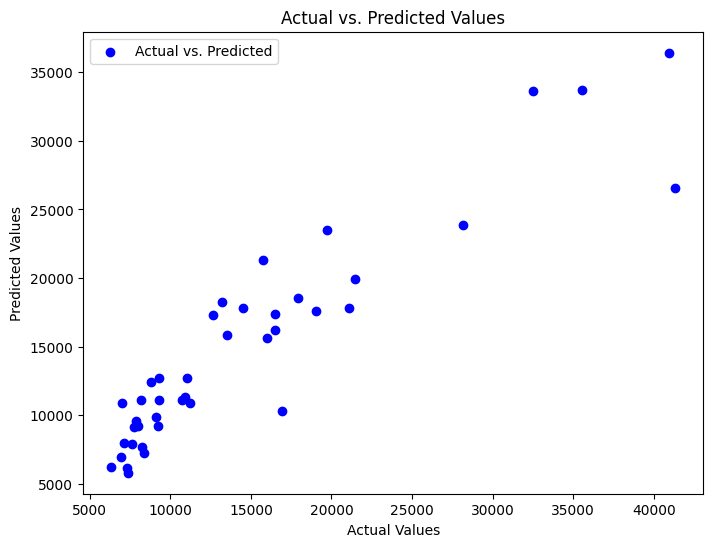

In [109]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_Test, y_test_pred, c='blue', label='Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

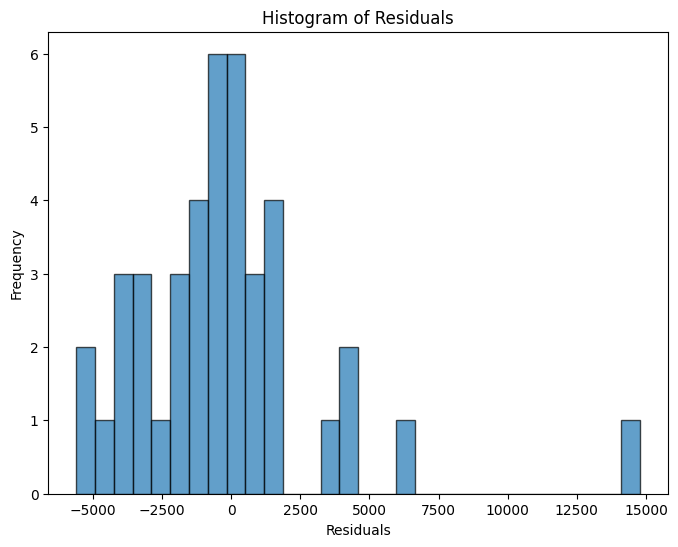

In [110]:
# Calculate the residuals
residuals = Y_Test - y_test_pred

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [111]:
df_res = pd.DataFrame()
df_res['Y_Test'] = Y_Test
df_res['y_test_pred'] = y_test_pred
df_res

,Y_Test,y_test_pred
182,7775.0,9116.252386
126,32528.0,33608.042087
151,6338.0,6208.816723
176,10898.0,11310.712867
37,7895.0,9543.741961
90,7099.0,7989.966603
181,15750.0,21350.349239
183,7975.0,9191.431042
69,28176.0,23842.111840
84,14489.0,17785.556352
